In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurancedataset/insurance.csv


In [116]:
df_in = pd.read_csv(os.path.join(dirname, filenames[0]))
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [117]:
df_in.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
df_in.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [119]:
df_in.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [120]:
# Assuming df_in is your DataFrame
unique_counts = df_in.nunique()

# Print the unique counts for each column
print(unique_counts)


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [121]:
df_encoded = pd.get_dummies(df_in, columns=['sex', 'smoker', 'region'], drop_first=True)


In [122]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [123]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df_encoded[['age', 'bmi', 'children']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'children']])


In [124]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
charges_column = df_encoded[['charges']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'charges' column
df_encoded['charges'] = scaler.fit_transform(charges_column)

# Drop the original 'charges' column if you don't need it anymore
# df_encoded = df_encoded.drop('charges', axis=1)

# Display the updated DataFrame
print(df_encoded.head())


   age     bmi  children   charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  0.251611     False        True             False   
1   18  33.770         1  0.009636      True       False             False   
2   28  33.000         3  0.053115      True       False             False   
3   33  22.705         0  0.333010      True       False              True   
4   32  28.880         0  0.043816      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [125]:
#df_encoded.head()

In [126]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


# Analyze the distribution of key variables:

               age          bmi      charges
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     0.193916
std      14.049960     6.098187     0.193301
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.057757
50%      39.000000    30.400000     0.131849
75%      51.000000    34.693750     0.247700
max      64.000000    53.130000     1.000000


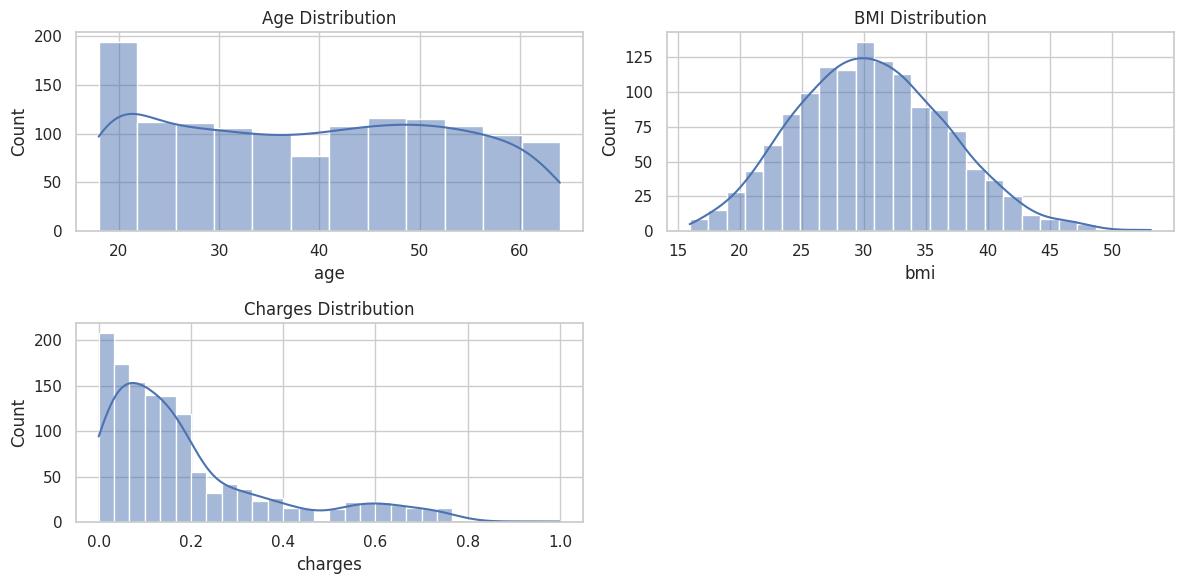

In [127]:
# Summary statistics
print(df_encoded[['age', 'bmi', 'charges']].describe())

# Histograms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df_encoded['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_encoded['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_encoded['charges'], kde=True)
plt.title('Charges Distribution')

plt.tight_layout()
plt.show()


# Investigate relationships between features and the target variable (charges):

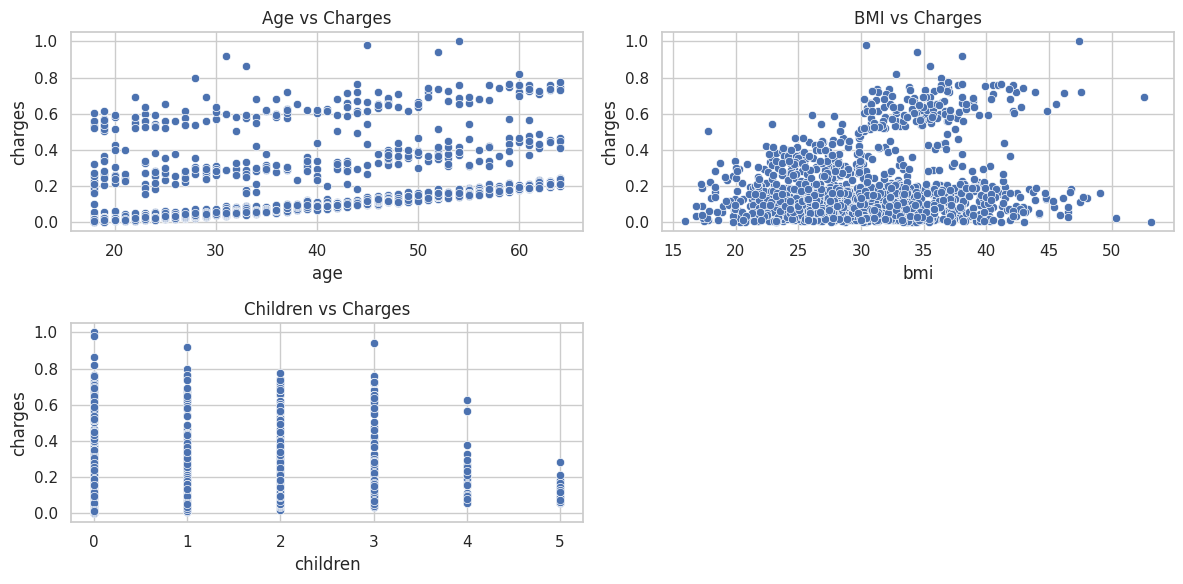

              age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000


In [128]:
# Scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=df_encoded)
plt.title('Age vs Charges')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df_encoded)
plt.title('BMI vs Charges')

plt.subplot(2, 2, 3)
sns.scatterplot(x='children', y='charges', data=df_encoded)
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df_encoded[['age', 'bmi', 'charges']].corr()
print(correlation_matrix)


# Identify potential outliers or influential points:

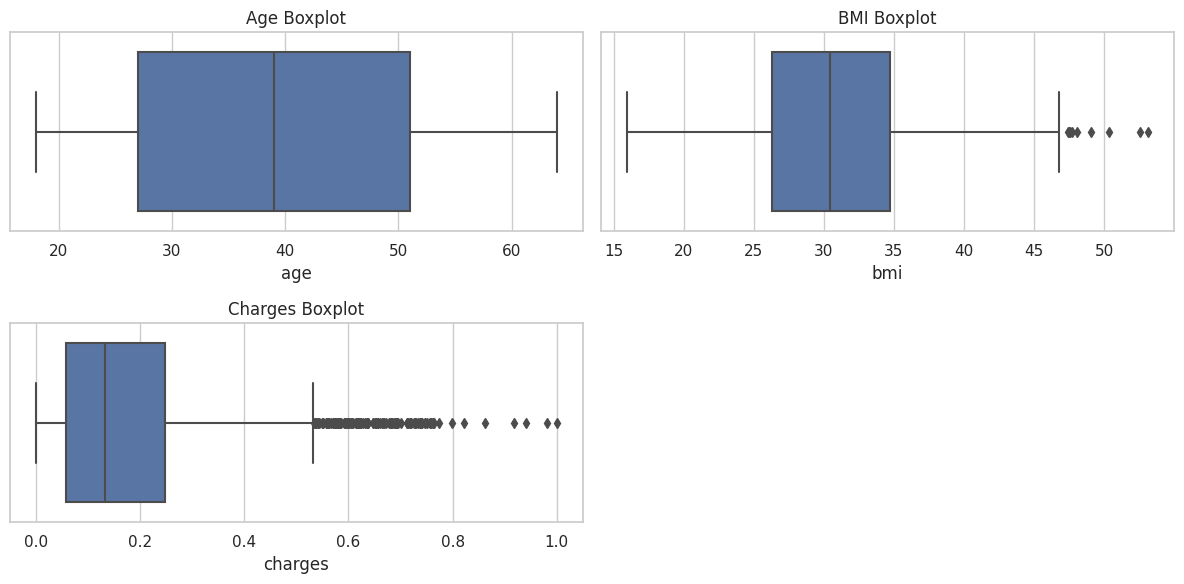

Potential outliers:
      age     bmi  children   charges  sex_male  smoker_yes  region_northwest  \
14     27  42.130         0  0.614378      True        True             False   
19     30  35.300         0  0.570094      True        True             False   
23     34  31.920         1  0.583892     False        True             False   
29     31  36.300         2  0.600000      True        True             False   
30     22  35.600         0  0.550112      True        True             False   
...   ...     ...       ...       ...       ...         ...               ...   
1300   45  30.360         0  0.981204      True        True             False   
1301   62  30.875         3  0.727811      True        True              True   
1303   43  27.800         0  0.585933      True        True             False   
1313   19  34.700         2  0.563073     False        True             False   
1323   42  40.370         2  0.682769     False        True             False   

      r

In [129]:
# Box plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=df_encoded['age'])
plt.title('Age Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_encoded['bmi'])
plt.title('BMI Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=df_encoded['charges'])
plt.title('Charges Boxplot')

plt.tight_layout()
plt.show()

# Outlier detection using IQR
Q1 = df_encoded['charges'].quantile(0.25)
Q3 = df_encoded['charges'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_encoded[(df_encoded['charges'] < (Q1 - 1.5 * IQR)) | (df_encoded['charges'] > (Q3 + 1.5 * IQR))]
print("Potential outliers:")
print(outliers)


# Split the dataset into training and testing sets:

In [130]:
from sklearn.model_selection import train_test_split

# Assuming 'charges' is the target variable
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Implement a linear regression model:

In [131]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

# Evaluate model performance using appropriate metrics:

In [132]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.7835929767120723
Mean Squared Error: 0.008560069824175875


In [133]:
target_summary = df_encoded['charges'].describe()
print(target_summary)


count    1338.000000
mean        0.193916
std         0.193301
min         0.000000
25%         0.057757
50%         0.131849
75%         0.247700
max         1.000000
Name: charges, dtype: float64


In [134]:
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: -0.20835425710556196
Coefficients: [ 4.10186172e-03  5.38069165e-03  6.78832560e-03 -2.96761704e-04
  3.77520746e-01 -5.91677384e-03 -1.05008696e-02 -1.29260661e-02]


Age: A positive coefficient for 'age' suggests that, on average, older individuals tend to have higher medical charges.

BMI (body mass index): A positive coefficient for 'bmi' suggests that, on average, individuals with higher BMI tend to have higher medical charges.

Smoker: If you have a binary variable for 'smoker,' a positive coefficient indicates that smokers, on average, have higher medical charges compared to non-smokers.

Region: If you have one-hot encoded 'region,' you would interpret each region's coefficient as the average difference in medical charges compared to the reference region (which is dropped in one-hot encoding).